/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


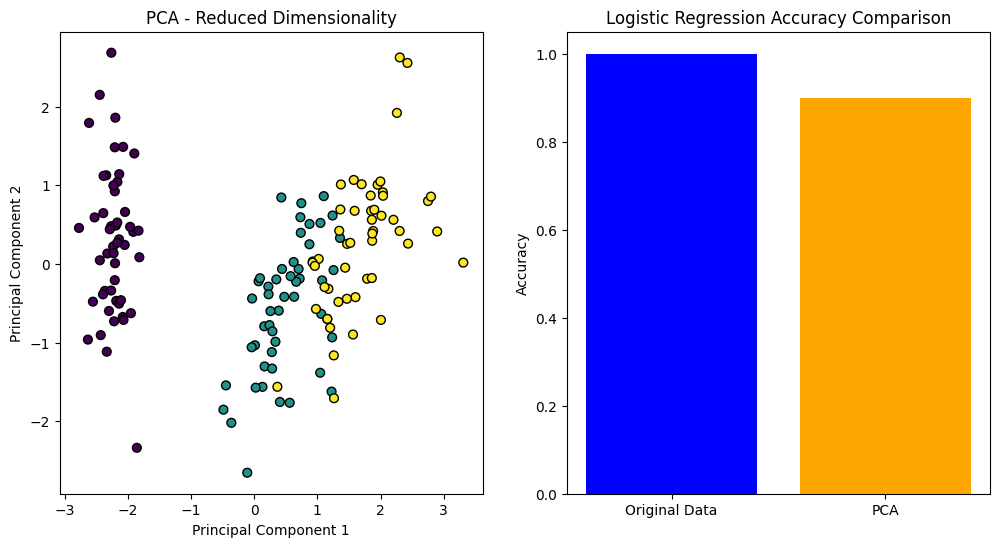

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Κανονικοποίηση δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Εφαρμογή PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Διαχωρισμός των δεδομένων σε σύνολα εκπαίδευσης και ελέγχου
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Εκπαίδευση μοντέλου Logistic Regression με αρχικά δεδομένα
model_original = LogisticRegression(random_state=42)
model_original.fit(X_train, y_train)

# Εκπαίδευση μοντέλου Logistic Regression με δεδομένα μειωμένα σε διαστάσεις με PCA
model_pca = LogisticRegression(random_state=42)
model_pca.fit(X_train_pca, y_train_pca)

# Προβλέψεις
y_pred_original = model_original.predict(X_test)
y_pred_pca = model_pca.predict(X_test_pca)

# Αξιολόγηση ακρίβειας
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Οπτικοποίηση αποτελεσμάτων
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA - Reduced Dimensionality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.bar(['Original Data', 'PCA'], [accuracy_original, accuracy_pca], color=['blue', 'orange'])
plt.title('Logistic Regression Accuracy Comparison')
plt.ylabel('Accuracy')

plt.show()


################################################################################


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Οπτικοποίηση της ανισορροπίας στις κλάσεις
plt.hist(y)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

# Χωρίζω τα δεδομένα σε σύνολα εκπαίδευσης και ελέγχου
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Αλγόριθμοι ταξινόμησης χωρίς τη χρήση του SMOTE
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Εκπαίδευση και αξιολόγηση
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f'\n{name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

# Εφαρμογή του SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Οπτικοποίηση της νέας κατανομής μετά τη χρήση του SMOTE
plt.hist(y_resampled)
plt.title('Distribution of Classes After SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

# Αλγόριθμοι ταξινόμησης με τη χρήση του SMOTE
classifiers_smote = {
    'Random Forest (SMOTE)': RandomForestClassifier(random_state=42),
    'SVM (SMOTE)': SVC(random_state=42)
}

# Εκπαίδευση και αξιολόγηση με το SMOTE
for name, clf in classifiers_smote.items():
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test)

    print(f'\n{name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

